In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import pandas as pd
from sklearn.inspection import permutation_importance
tips_data = pd.read_csv('tips.csv')
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [43]:
# Converting categorical features using one-hot encoding
tips_data = pd.get_dummies(tips_data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)


In [98]:
X = tips_data.drop(columns=['tip'])
y = tips_data['tip']
y_test_set = tips_data['tip']
y_full_set = tips_data['total_bill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5)
}
performance = {}
model_predictions = {}
model_predictions_full = {}

In [92]:
# Initialize scalers for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale the data for SVR
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [95]:
for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    model_predictions[model_name] = y_pred

    X_scaled = sc_X.transform(X) if model_name == 'Support Vector Regression' else X
    y_pred_full = model.predict(X_scaled)
    y_pred_full = sc_y.inverse_transform(y_pred_full.reshape(-1, 1))

    model_predictions_full[model_name] = y_pred_full

    #Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    #Performance metrics
    performance[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2 Score': r2
    }

    #Printing the performance of each model
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")
    


Linear Regression:
  Mean Absolute Error (MAE): 0.7172
  Mean Squared Error (MSE): 0.9318
  R² Score: 0.2931

Ridge Regression:
  Mean Absolute Error (MAE): 0.7155
  Mean Squared Error (MSE): 0.9261
  R² Score: 0.2975

Lasso Regression:
  Mean Absolute Error (MAE): 0.6720
  Mean Squared Error (MSE): 0.7803
  R² Score: 0.4080

Decision Tree:
  Mean Absolute Error (MAE): 0.8927
  Mean Squared Error (MSE): 1.3536
  R² Score: -0.0269

Random Forest:
  Mean Absolute Error (MAE): 0.7622
  Mean Squared Error (MSE): 0.9391
  R² Score: 0.2876

Support Vector Regression:
  Mean Absolute Error (MAE): 0.6226
  Mean Squared Error (MSE): 0.7366
  R² Score: 0.4412

KNN Regression:
  Mean Absolute Error (MAE): 0.7614
  Mean Squared Error (MSE): 1.0124
  R² Score: 0.2320



In [51]:
# Convert the performance dictionary to a DataFrame and display the summary
performance_df = pd.DataFrame(performance).T
print("\nModel Performance Summary:")
print(performance_df)



Model Performance Summary:
                                MAE       MSE  R2 Score
Linear Regression          0.717182  0.931832  0.293097
Ridge Regression           0.715508  0.926062  0.297474
Lasso Regression           0.671966  0.780329  0.408030
Decision Tree              0.892703  1.353632 -0.026888
Random Forest              0.762172  0.939135  0.287557
Support Vector Regression  0.622645  0.736563  0.441231
KNN Regression             0.761351  1.012412  0.231968


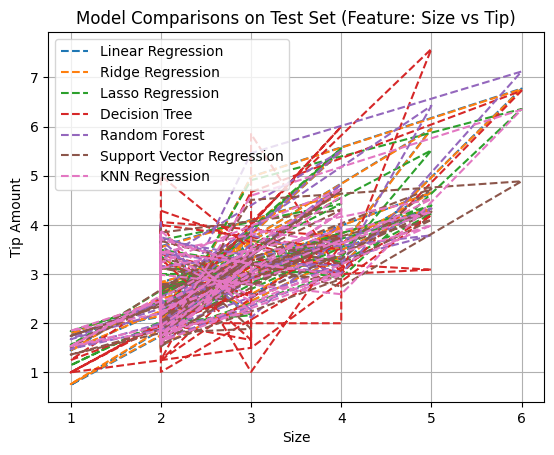

In [88]:
# Plot predictions from each regression model
for model_name, y_pred in model_predictions.items():
    plt.plot(X_test['size'], y_pred, label=model_name, linestyle='--')

plt.title('Model Comparisons on Test Set (Feature: Size vs Tip)')
plt.xlabel('Size')
plt.ylabel('Tip Amount')
plt.legend()
plt.grid(True)
plt.show()

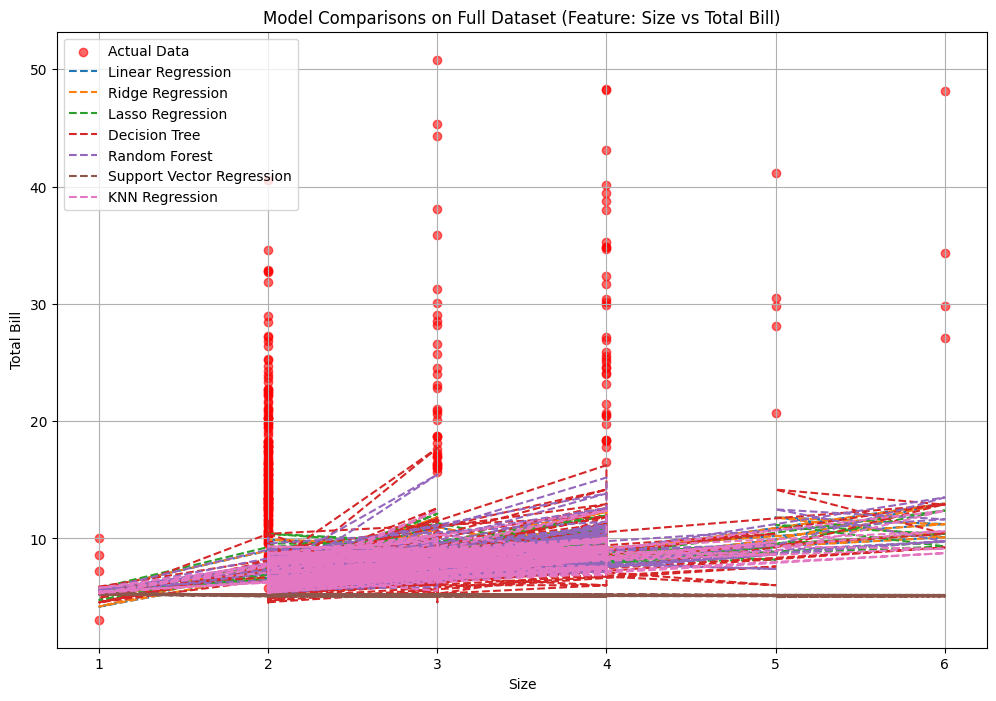

In [99]:
# Plotting model comparisons on full dataset (Size vs Total Bill)
plt.figure(figsize=(12, 8))
plt.scatter(X['size'], y_full_set, color='red', label='Actual Data', alpha=0.6)

# Plot predictions from each regression model on full dataset (size vs total_bill)
for model_name, y_pred in model_predictions_full.items():
    plt.plot(X['size'], y_pred, label=model_name, linestyle='--')

plt.title('Model Comparisons on Full Dataset (Feature: Size vs Total Bill)')
plt.xlabel('Size')
plt.ylabel('Total Bill')
plt.legend()
plt.grid(True)
plt.show()


Linear Regression Coefficients:
smoker_Yes   -0.301595
day_Thur     -0.252056
day_Sun      -0.198171
day_Sat      -0.141407
sex_Male      0.071772
total_bill    0.096393
time_Lunch    0.184112
size          0.272812
dtype: float64


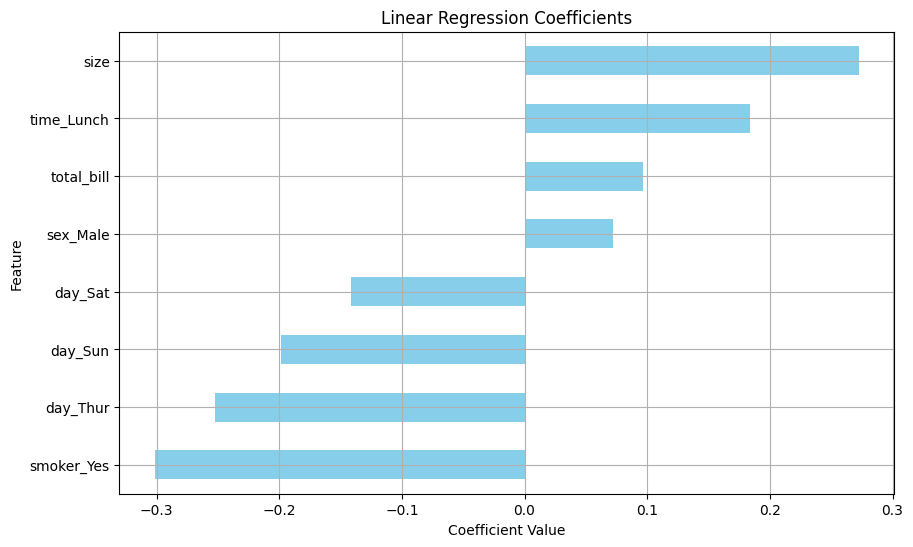

In [55]:
# Feature Importance Analysis
# 1. Linear Regression Coefficients
linear_model = models['Linear Regression']
coefficients = pd.Series(linear_model.coef_, index=X.columns)
coefficients = coefficients.sort_values()

print("\nLinear Regression Coefficients:")
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='skyblue')
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


Random Forest Feature Importances:
day_Thur      0.009531
time_Lunch    0.010906
day_Sun       0.020207
sex_Male      0.020819
day_Sat       0.028683
smoker_Yes    0.059069
size          0.072578
total_bill    0.778206
dtype: float64


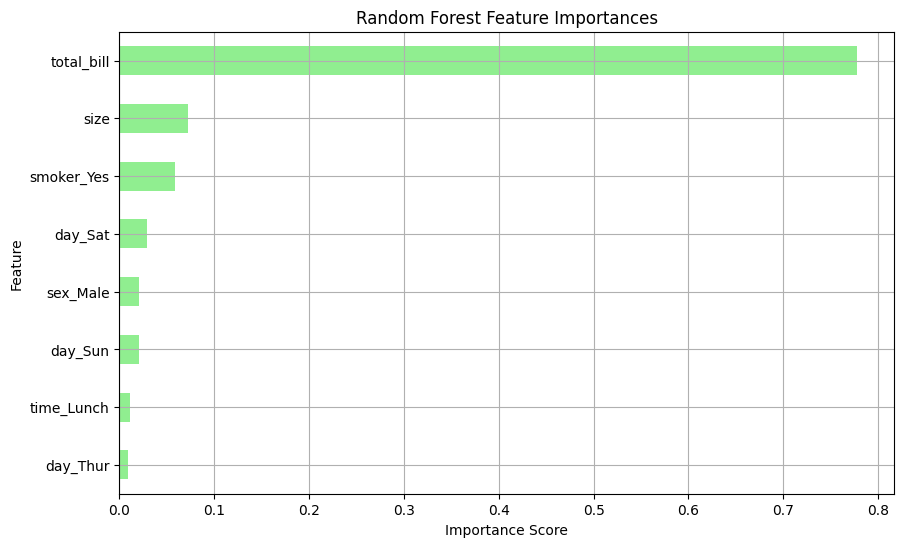

In [56]:
# 2. Feature Importance from Random Forest
tree_model = models['Random Forest']
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values()

print("\nRandom Forest Feature Importances:")
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='lightgreen')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.show()


Permutation Feature Importances:
sex_Male     -0.034675
size         -0.020560
day_Sat      -0.015695
day_Thur     -0.004187
time_Lunch   -0.003781
day_Sun       0.041186
smoker_Yes    0.059052
total_bill    1.042825
dtype: float64


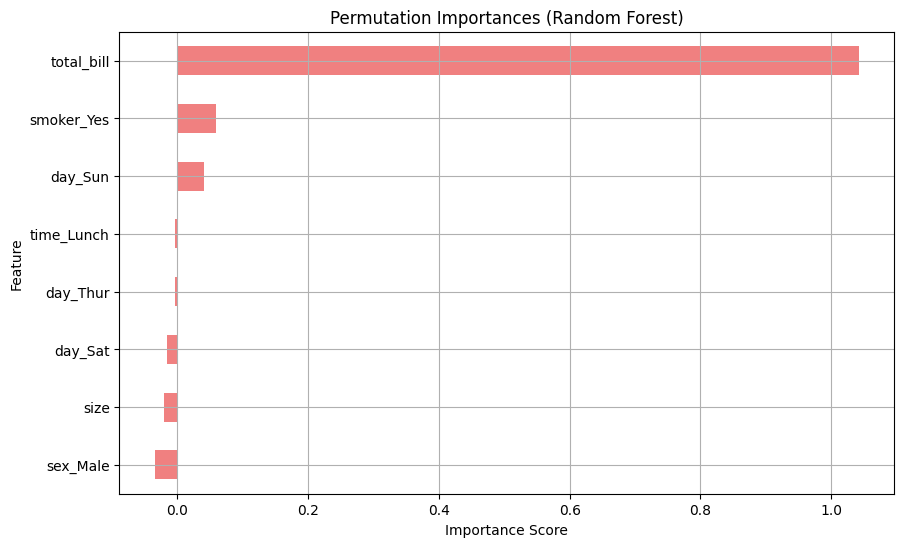

In [ ]:

# 3. Permutation Importance (using Random Forest as an example)
perm_importance = permutation_importance(tree_model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.Series(perm_importance.importances_mean, index=X.columns)
perm_importance_df = perm_importance_df.sort_values()

print("\nPermutation Feature Importances:")
print(perm_importance_df)

# Plotting permutation importances
plt.figure(figsize=(10, 6))
perm_importance_df.plot(kind='barh', color='lightcoral')
plt.title("Permutation Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.show()

In [58]:
import seaborn as sns


def actionable_insights(feature_importances, coefficients, permutation_importance):
    insights = []
    
    # 1. Insights based on Linear Regression Coefficients
    top_positive_coef = coefficients.nlargest(3) 
    top_negative_coef = coefficients.nsmallest(3)
    
    insights.append("1. From the Linear Regression model:")
    insights.append(f"   - The top 3 features positively influencing tips are: {top_positive_coef.index.tolist()} with coefficients: {top_positive_coef.values.tolist()}")
    insights.append(f"   - The top 3 features negatively influencing tips are: {top_negative_coef.index.tolist()} with coefficients: {top_negative_coef.values.tolist()}")
    
    # 2. Insights based on Random Forest Feature Importances
    top_features_rf = feature_importances.nlargest(3)
    
    insights.append("\n2. From the Random Forest model:")
    insights.append(f"   - The top 3 features influencing tips are: {top_features_rf.index.tolist()} with importance scores: {top_features_rf.values.tolist()}")
    
    # 3. Insights from Permutation Importance
    top_features_perm = permutation_importance.nlargest(3)
    
    insights.append("\n3. From the Permutation Importance analysis:")
    insights.append(f"   - The top 3 features influencing tips are: {top_features_perm.index.tolist()} with importance scores: {top_features_perm.values.tolist()}")
    
    recommendations = []
    
    if 'time_Dinner' in top_features_rf.index or 'time_Lunch' in top_features_rf.index:
        recommendations.append("Focus on increasing customer engagement during peak times (Lunch/Dinner) to boost tips.")
    
    if 'sex_Male' in top_features_rf.index:
        recommendations.append("Consider personalized service for male customers as they tend to leave higher tips.")
    
    if 'smoker_Yes' in top_features_rf.index:
        recommendations.append("Explore targeted promotions or loyalty programs for smokers to increase their tipping frequency.")
    
    return insights, recommendations

insights, recommendations = actionable_insights(feature_importances, coefficients, perm_importance_df)



In [59]:
print("\n--- Actionable Insights for Management ---")
for insight in insights:
    print(insight)

print("\n--- Recommendations for Management ---")
for rec in recommendations:
    print(rec)


--- Actionable Insights for Management ---
1. From the Linear Regression model:
   - The top 3 features positively influencing tips are: ['size', 'time_Lunch', 'total_bill'] with coefficients: [0.27281191431244284, 0.18411165699457138, 0.09639326858411049]
   - The top 3 features negatively influencing tips are: ['smoker_Yes', 'day_Thur', 'day_Sun'] with coefficients: [-0.3015945190079933, -0.2520555056503803, -0.1981709501421832]

2. From the Random Forest model:
   - The top 3 features influencing tips are: ['total_bill', 'size', 'smoker_Yes'] with importance scores: [0.7782064795081748, 0.07257844749990469, 0.05906909669138226]

3. From the Permutation Importance analysis:
   - The top 3 features influencing tips are: ['total_bill', 'smoker_Yes', 'day_Sun'] with importance scores: [1.0428252381953138, 0.059051818977713055, 0.04118617628606004]

--- Recommendations for Management ---
Explore targeted promotions or loyalty programs for smokers to increase their tipping frequency.


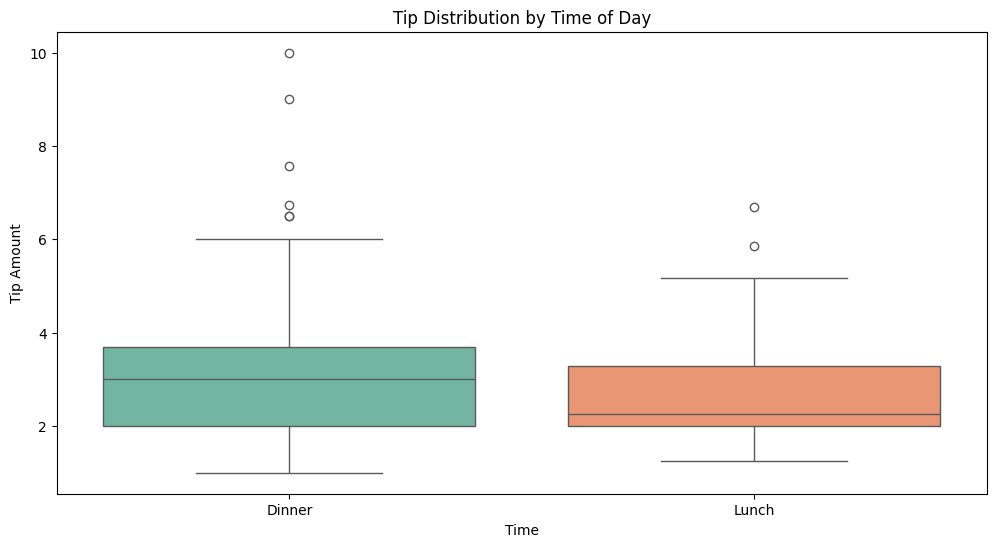

In [60]:
#plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=tips_data, x='time', y='tip', palette='Set2')
plt.title('Tip Distribution by Time of Day')
plt.xlabel('Time')
plt.ylabel('Tip Amount')
plt.show()

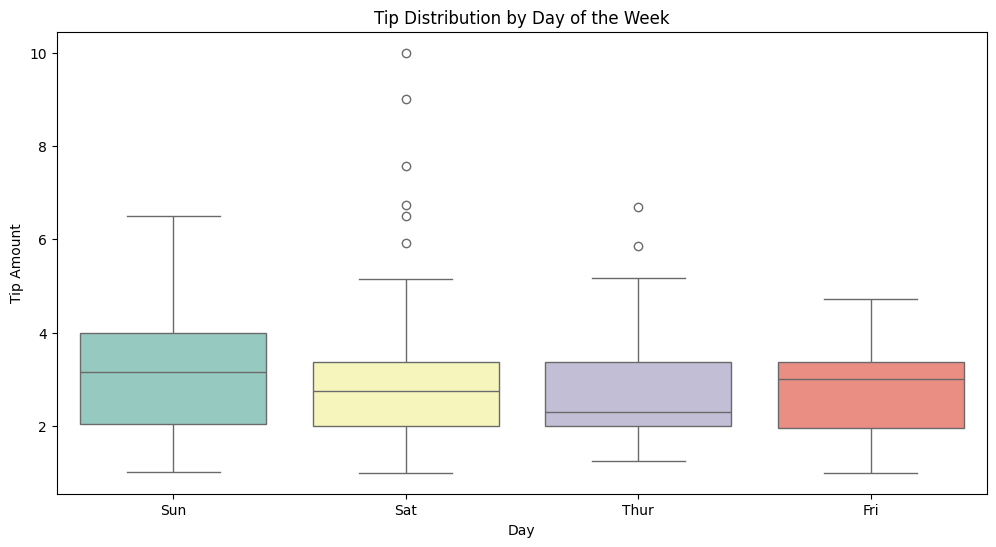

In [61]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=tips_data, x='day', y='tip', palette='Set3')
plt.title('Tip Distribution by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()


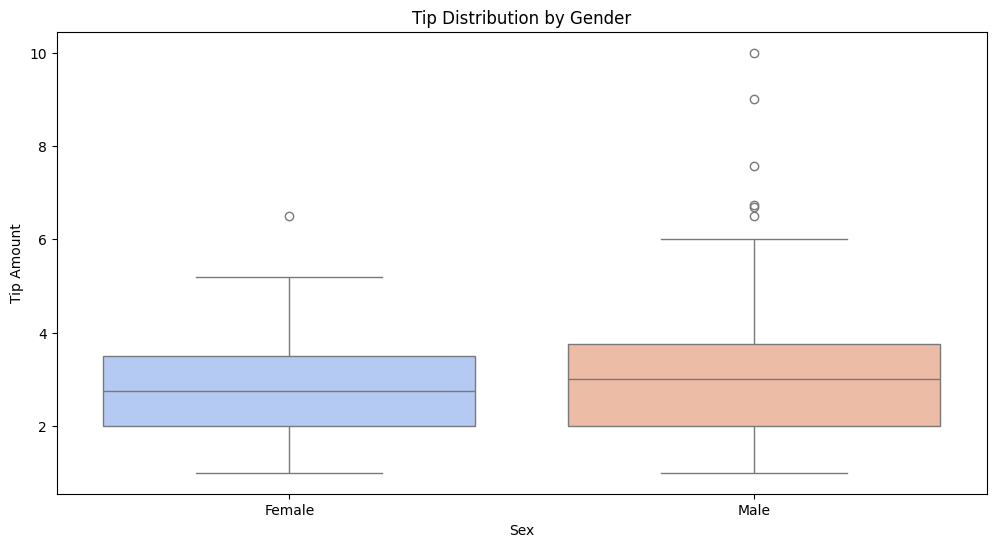

In [62]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=tips_data, x='sex', y='tip', palette='coolwarm')
plt.title('Tip Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Tip Amount')
plt.show()


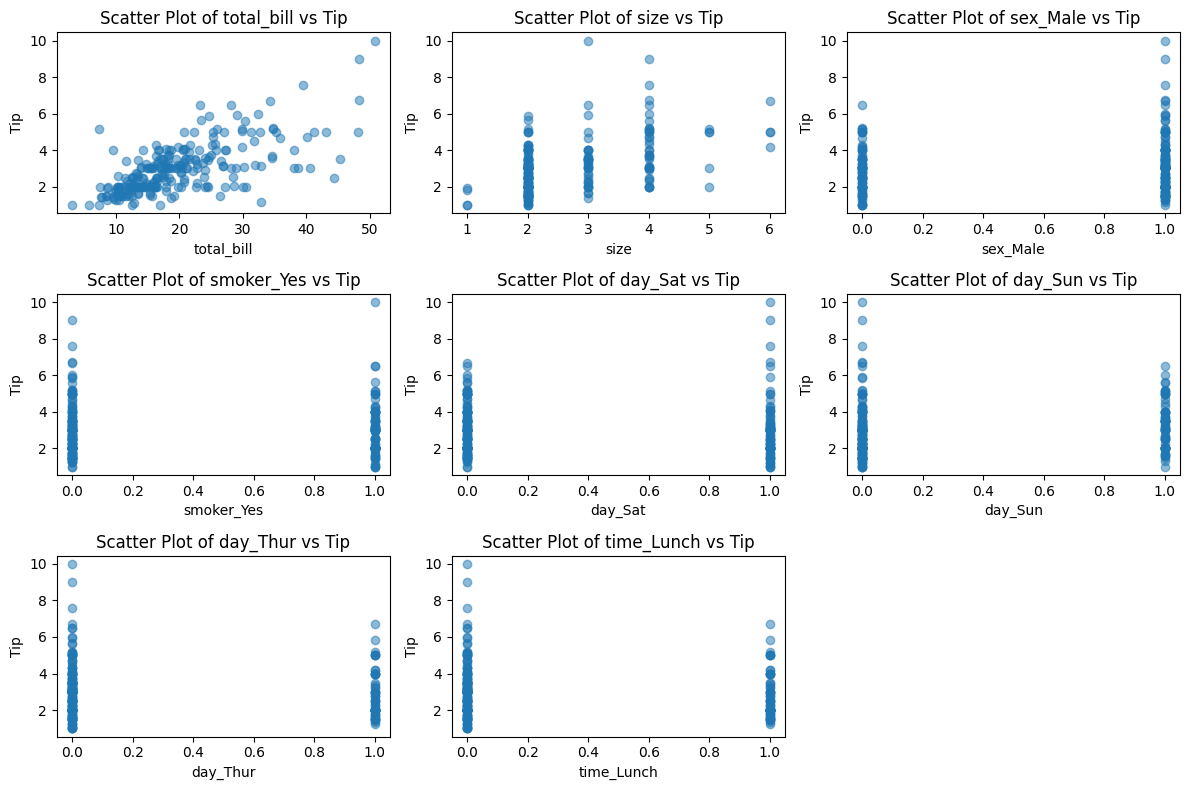

In [63]:
# 1. Scatter Plot for each predictor against the target variable (tip)
def scatter_plots(X, y):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(X.columns):
        plt.subplot(3, 3, i+1)
        plt.scatter(X[col], y, alpha=0.5)
        plt.title(f'Scatter Plot of {col} vs Tip')
        plt.xlabel(col)
        plt.ylabel('Tip')
    plt.tight_layout()
    plt.show()

scatter_plots(X, y)


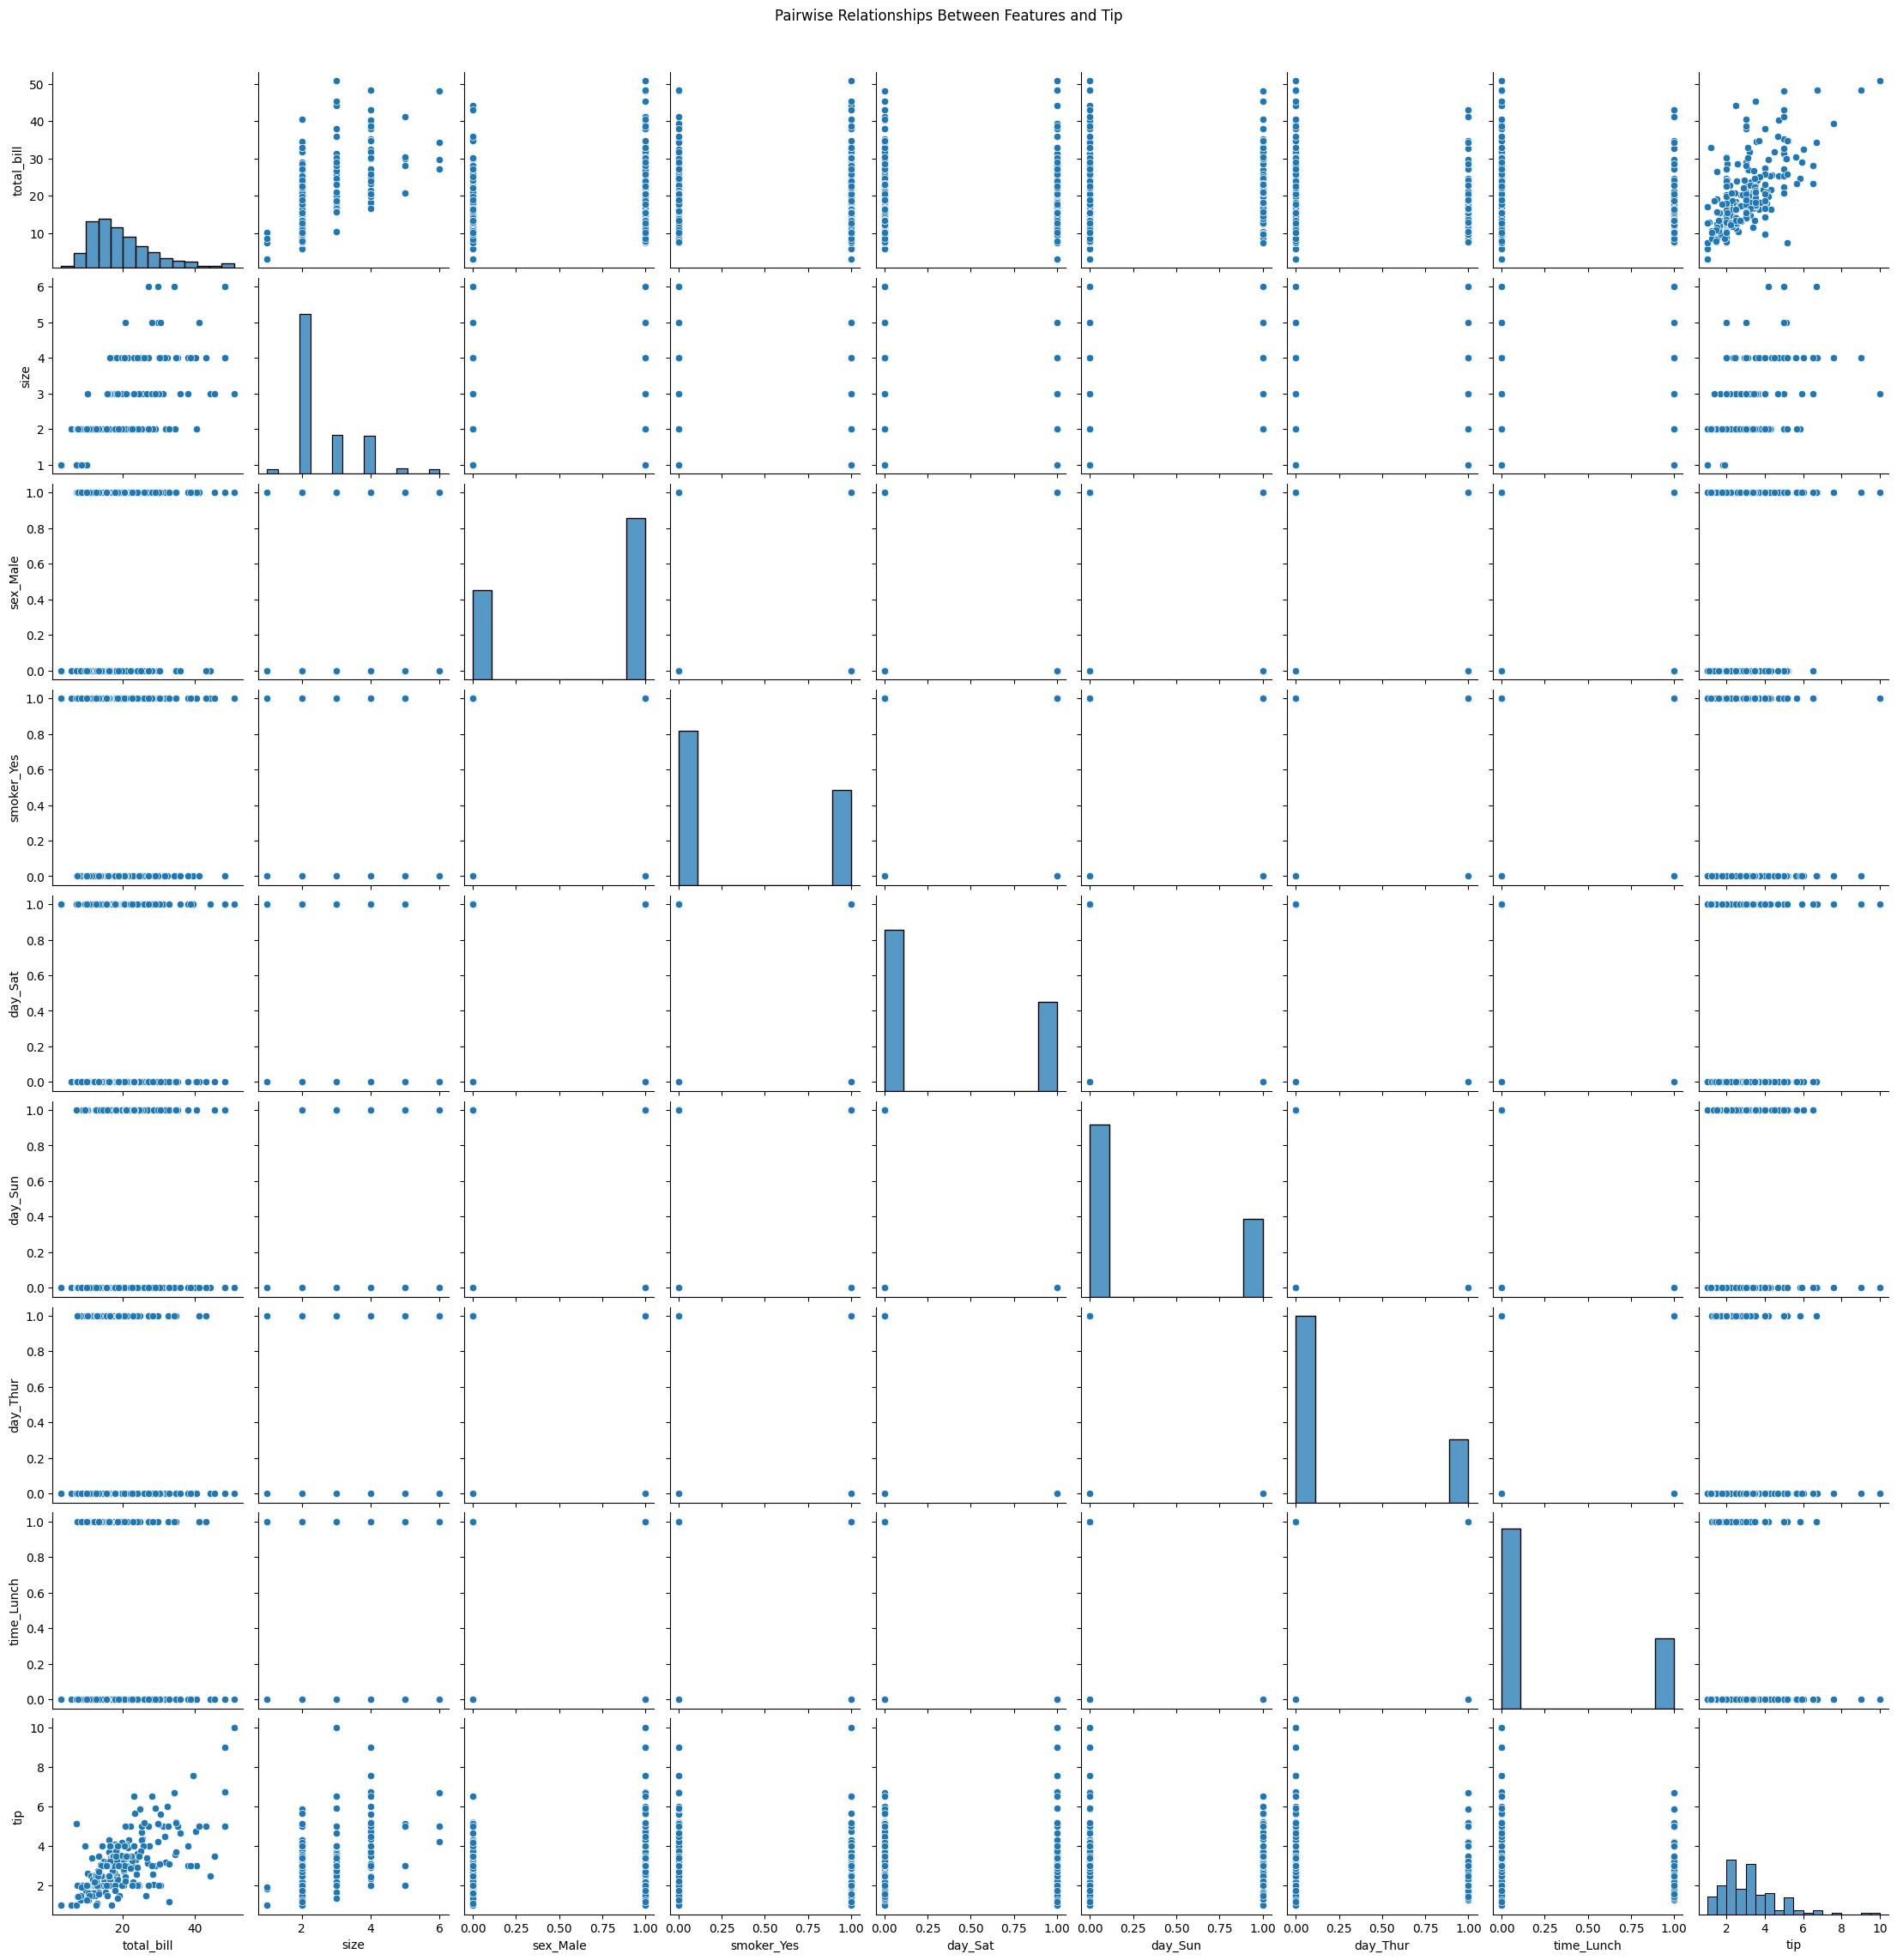

In [64]:

# 2. Pair Plot for Multiple Features\
def pair_plot(X, y):
    data = X.copy()
    data['tip'] = y
    sns.pairplot(data)
    plt.suptitle('Pairwise Relationships Between Features and Tip', y=1.02)
    plt.show()

pair_plot(X, y)



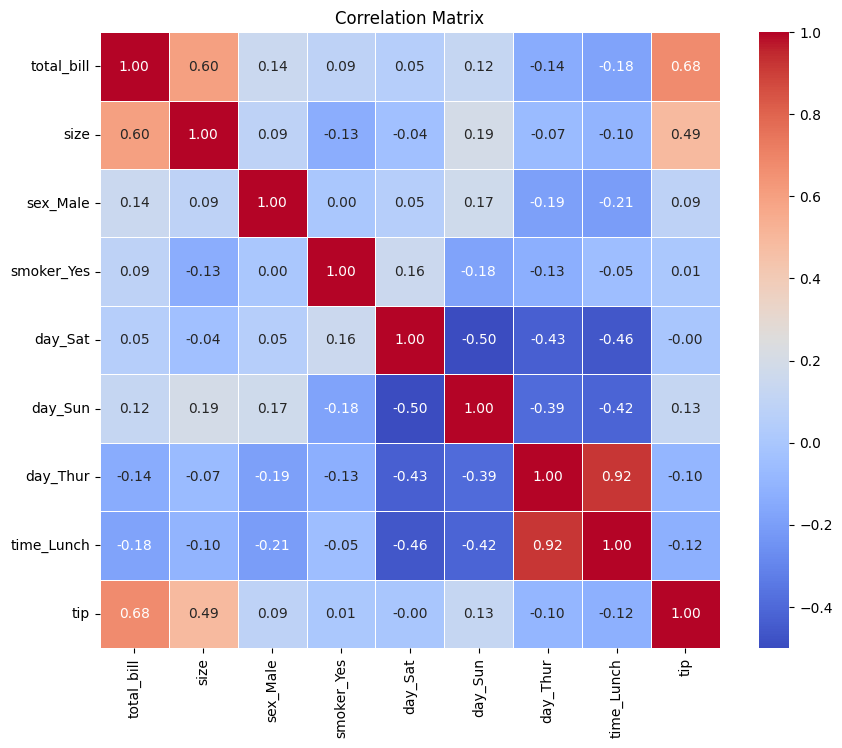

In [65]:
# 3. Correlation Matrix Heatmap
def correlation_matrix(X, y):
    corr = X.copy()
    corr['tip'] = y
    correlation = corr.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

correlation_matrix(X, y)



In [74]:
# 4. Statistical Test for Linearity (Rainbow Test)
def rainbow_test(X, y):
    X_with_const = sm.add_constant(X)  # Add constant to X for the intercept
    model = sm.OLS(y, X_with_const).fit()  # Fit linear model
    rainbow_test = sm.stats.diagnostic.linear_rainbow(model)
    print(f"Rainbow Test Statistic: {rainbow_test[0]:.4f}, p-value: {rainbow_test[1]:.4f}")
    if rainbow_test[1] < 0.05:
        print("The Rainbow Test indicates that the data may not follow a linear relationship (p < 0.05).")
    else:
        print("The Rainbow Test suggests that the data follows a linear relationship (p > 0.05).")

rainbow_test(X, y)



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [67]:
# 5. Residuals Plot
def residuals_plot(model, X, y):
    y_pred = model.predict(X)
    residuals = y - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()



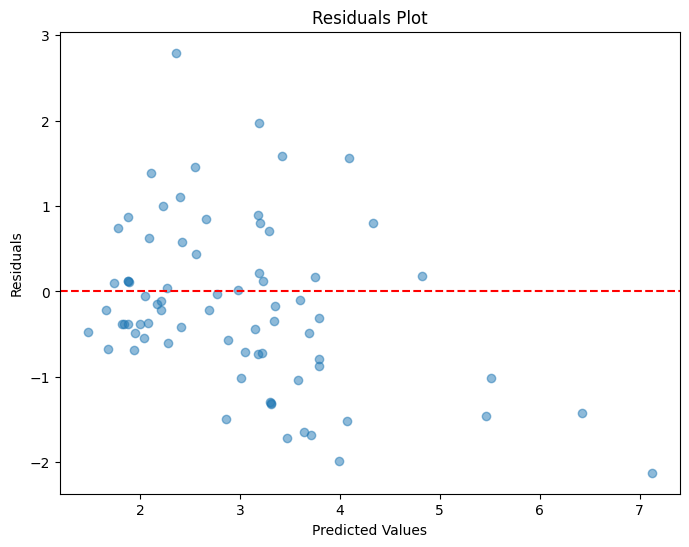

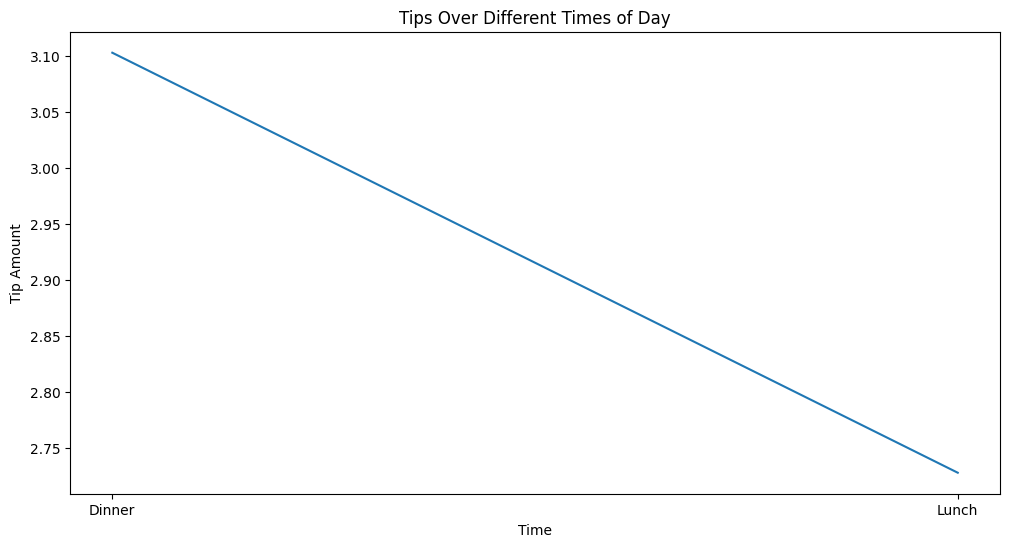

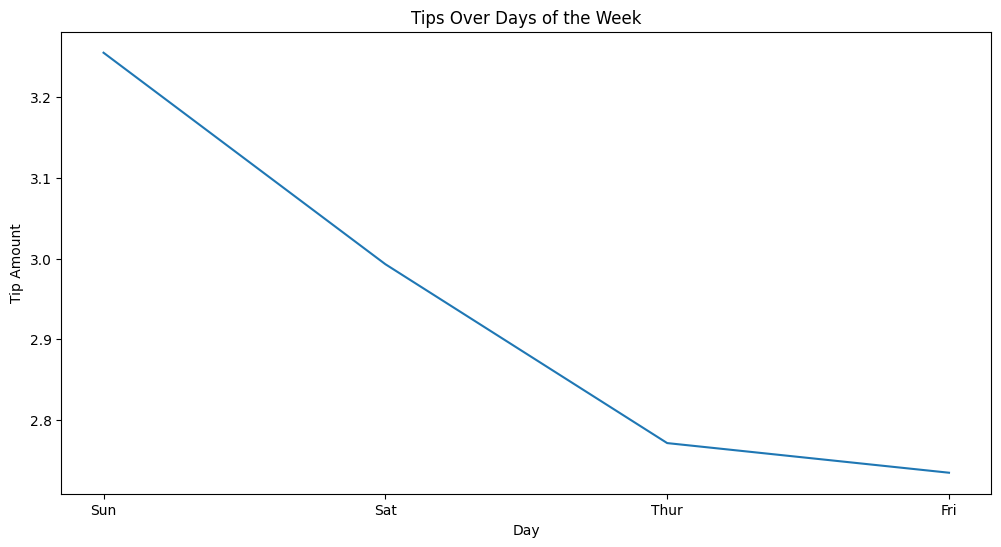

In [68]:
#Residuals plot for Random Forest (we can do it for any model)
rf_model = models['Random Forest']
rf_model.fit(X_train, y_train)
residuals_plot(rf_model, X_test, y_test)

# Line Plot for time-related features
def line_plot_for_time_related_features(tips_data):
    if 'time' in tips_data.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=tips_data, x='time', y='tip', ci=None)
        plt.title('Tips Over Different Times of Day')
        plt.xlabel('Time')
        plt.ylabel('Tip Amount')
        plt.show()

    if 'day' in tips_data.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=tips_data, x='day', y='tip', ci=None)
        plt.title('Tips Over Days of the Week')
        plt.xlabel('Day')
        plt.ylabel('Tip Amount')
        plt.show()

line_plot_for_time_related_features(tips_data)
